# **Robert Rosen PROJECT 2 Machine Learning 9/28/23**


Project-2 In this project, you will analyze and predict the weekly sales for a retail store. The dataset includes weekly sales data for 45 store locations over a 143-week period. Create a machine learning model (regression) to predict weekly sales values using the train and test datasets provided.

The purpose of this project is to successfully forecast weekly sales of a retail store based on historical data collected over a 143-week period from forty five different store locations.

Data Visualization:
A description of the data showed that all rows for all attributes werer non-null, therefore an imputer was not needed in prepocessing of the data.  A histogram of the attributes showed that some scaling was needed in cleaning the data for regression models.  Lastly, a correlation matrix is displayed below.  It can be seen that best correlation(-.34) was a negative correlation with the Store attribute and our target attribute of WeeklySales.  The rest of the correlatioin fell with a range of -.11 to .11.

Preprocessing of Data:

Linear Regression Model:  

Cross-Validation Scores:
[499143.41278831 534922.41009004 525323.70652581 505496.46990829
 509840.07246046 508956.89206921 563714.7110591  544289.33728177
 532363.11967668 516203.77163986]

R^2 Value:
0.11805002578062618

Mean Absolute Error:
437453.8028262147

Mean Squared Error:
270532578271.3066

Decision Tree Regression Model:

Cross-Validation Scores:
[174664.74240622 197711.62700897 203121.72200614 151531.97134842
 188747.76588181 197811.58689647 177636.16065639 159429.84763341
 193968.74204093 194799.60918278]

R^2 Value:
0.9267713650507393

Mean Absolute Error:
83838.01965034964

Mean Squared Error:
22462420766.718143

NOW USING Randomized Search and Grid Search for Decision Tree

Best Hyperparameters from Random Search:
{'max_features': 7, 'min_samples_split': 3}

R^2 Value (Random Search):
0.9179269425353034
Mean Absolute Error (Random Search):
84177.19268453769
Mean Squared Error (Random Search):
25175391452.543606



Best Hyperparameters from Grid Search:
{'max_features': 6, 'min_samples_split': 4}

R^2 Value (Grid Search):
0.9050432619464999
Mean Absolute Error (Grid Search):
86215.10418285418
Mean Squared Error (Grid Search):
29127379013.287113

Random Forest Regression Model:

Cross-Validation Scores:
[149812.12616798 160323.98049694 177900.23537031 120157.99342999
 137289.8406949  166819.68678005 172838.85192035 153142.8778096
 149220.05075158 151005.93631666]

R^2 Value:
0.944276540035834

Mean Absolute Error:
72120.19677466978

Mean Squared Error:
17092819020.31556

NOW USING Randomized Search and Grid Search for Random Forest

Best Hyperparameters from Random Search:
{'max_features': 5, 'n_estimators': 100}

R^2 Value (Random Search):
0.9537889948929977

Mean Absolute Error (Random Search):
66930.79790738148

Mean Squared Error (Random Search):
14174933637.444872



Best Hyperparameters from Grid Search:
{'max_features': 4, 'n_estimators': 200}

R^2 Value (Grid Search):
0.9539233606617717

Mean Absolute Error (Grid Search):
67440.12159716389

Mean Squared Error (Grid Search):
14133717787.430237


CONCLUSIONS:
The Linear Regression Model was the worst performing of the three models run. An R^2 value of .11 was produced.  The Decision Tree and Random Forest models produced .92 and .94 R^2 values respectivelly.  The increase in R^2 values for both models gave me reason to fine tune both models.  I used a Randomized Search and Grid Search on both of these models.  The fine tuning actually lowered the R^2 value for the Decision Tree Model.  However, for the Random Forest Model using the both searches increased the R^2 value above .95.  The Grid Search scored the best with .9539.


Below the Random Forest Model is some extra things I was attempting and have not gotten the code to work.  The cool looking color is not my work.  Google and ChatGPT were used for help in conjunction with the class lectures for the more complex code questions, terminology, and general understanding of the model parameters and their purpose.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# read in the files and save to appropriate named dataframes
trainData = pd.read_csv("/content/trainSales.csv")
testData = pd.read_csv("/content/testSales.csv")

# length of each file  80% training data  20% testing data
print("Length of Training and Testing Data Sets")
print(len(trainData))
print(len(testData))
print()
#  DATA DESCRIPTIONS AND INFORMATION
print("Description of the data set")
trainData.describe()
print()
print("Data set information")
trainData.info()
print()
trainData["Holiday"].value_counts()
print()
print("What the data set looks like")
trainData.head(5)

Length of Training and Testing Data Sets
5148
1287

Description of the data set

Data set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148 entries, 0 to 5147
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5148 non-null   int64  
 1   Week          5148 non-null   int64  
 2   Temperature   5148 non-null   float64
 3   Holiday       5148 non-null   object 
 4   CPI           5148 non-null   float64
 5   FuelPrice     5148 non-null   float64
 6   Unemployment  5148 non-null   float64
 7   WeeklySales   5148 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 321.9+ KB


What the data set looks like


,Store,Week,Temperature,Holiday,CPI,FuelPrice,Unemployment,WeeklySales
0,8,109,50.95,No,224.395979,3.630,5.825,952264.91
1,2,127,84.20,No,221.521506,3.227,6.565,2041507.40
2,38,72,86.84,No,129.043200,3.935,13.736,356797.00
3,41,27,69.21,No,190.099003,2.690,7.335,1338132.72
4,35,125,73.23,No,142.160646,3.564,8.876,911696.00


**DATA VISUALIZATION SECTION **

Histogram looks like the CPI attribute has zero values, but the inf0() function shows that all attributes have the same number of rows filled with data.

Temperature, Unemployment, and Weekly Sales diplay tails in their histograms, where normal distributions will be preferred.

The first set of correlations show every combination between all attributes.
The next list of correlations are in ascending order versus the Weekly Sales.

Of interest Weekly Sales and the Store Number had a negative correlation(-.34). And was the only correlation of any signifigance against our label(Weekly Sales). Unemployment and CPI were negatively correlated to a lesser degree as well. The Fuel Price and the Week number show a strong positive correlation(.77).

Scatter plots did not reveal any non linear relationships.

 HISTOGRAMS


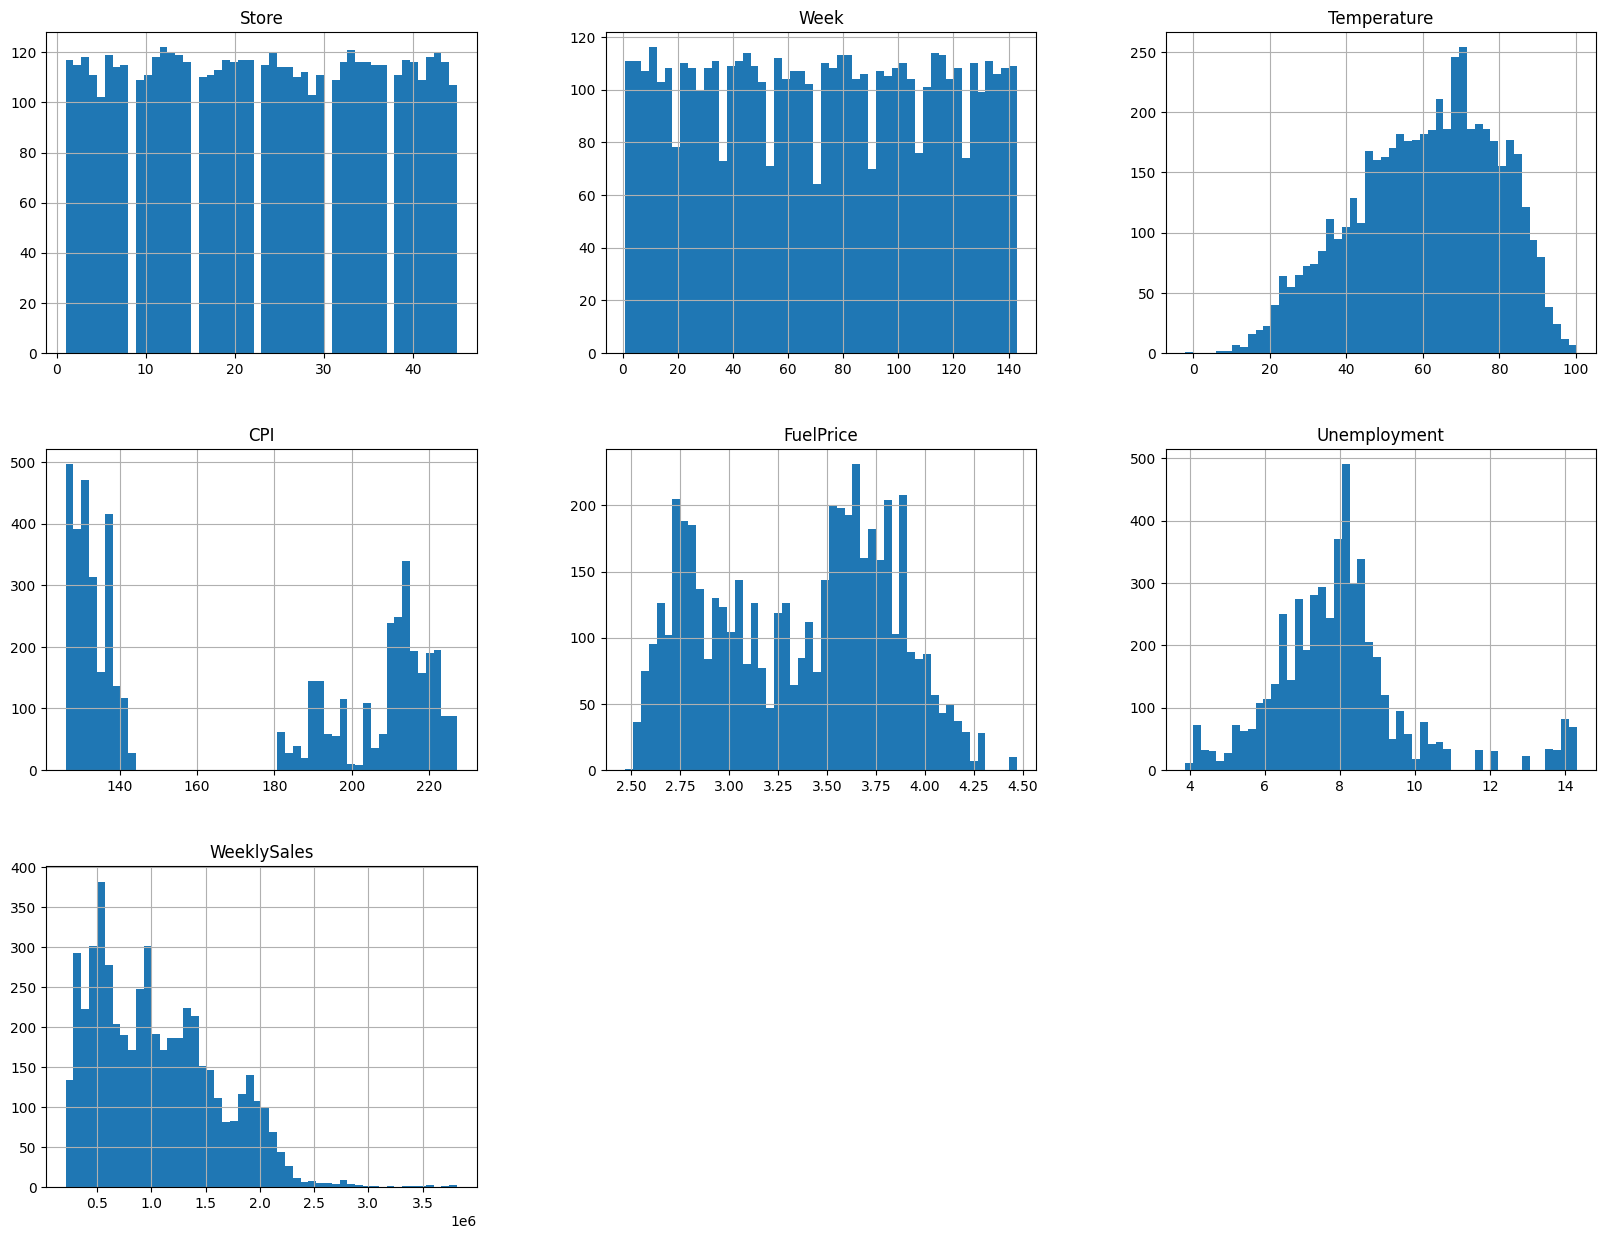

Correlation Matrix of traing in data

 CORRELATION DATA
                 Store      Week  Temperature       CPI  FuelPrice  \
Store         1.000000 -0.005336    -0.024440 -0.210960   0.050190   
Week         -0.005336  1.000000     0.149656  0.085618   0.774069   
Temperature  -0.024440  0.149656     1.000000  0.169733   0.153444   
CPI          -0.210960  0.085618     0.169733  1.000000  -0.161581   
FuelPrice     0.050190  0.774069     0.153444 -0.161581   1.000000   
Unemployment  0.217626 -0.254887     0.113150 -0.299661  -0.042450   
WeeklySales  -0.344220  0.009238    -0.071988 -0.062290   0.007560   

              Unemployment  WeeklySales  
Store             0.217626    -0.344220  
Week             -0.254887     0.009238  
Temperature       0.113150    -0.071988  
CPI              -0.299661    -0.062290  
FuelPrice        -0.042450     0.007560  
Unemployment      1.000000    -0.111939  
WeeklySales      -0.111939     1.000000  

 CORRELATION VS WEEKLY SALES IN ASCEDNING ORDE

<ipython-input-4-3393adc73641>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = trainData.corr()


array([[<Axes: xlabel='Week', ylabel='Week'>,
        <Axes: xlabel='Temperature', ylabel='Week'>,
        <Axes: xlabel='CPI', ylabel='Week'>,
        <Axes: xlabel='FuelPrice', ylabel='Week'>,
        <Axes: xlabel='Unemployment', ylabel='Week'>,
        <Axes: xlabel='Store', ylabel='Week'>,
        <Axes: xlabel='WeeklySales', ylabel='Week'>],
       [<Axes: xlabel='Week', ylabel='Temperature'>,
        <Axes: xlabel='Temperature', ylabel='Temperature'>,
        <Axes: xlabel='CPI', ylabel='Temperature'>,
        <Axes: xlabel='FuelPrice', ylabel='Temperature'>,
        <Axes: xlabel='Unemployment', ylabel='Temperature'>,
        <Axes: xlabel='Store', ylabel='Temperature'>,
        <Axes: xlabel='WeeklySales', ylabel='Temperature'>],
       [<Axes: xlabel='Week', ylabel='CPI'>,
        <Axes: xlabel='Temperature', ylabel='CPI'>,
        <Axes: xlabel='CPI', ylabel='CPI'>,
        <Axes: xlabel='FuelPrice', ylabel='CPI'>,
        <Axes: xlabel='Unemployment', ylabel='CPI'>,
       

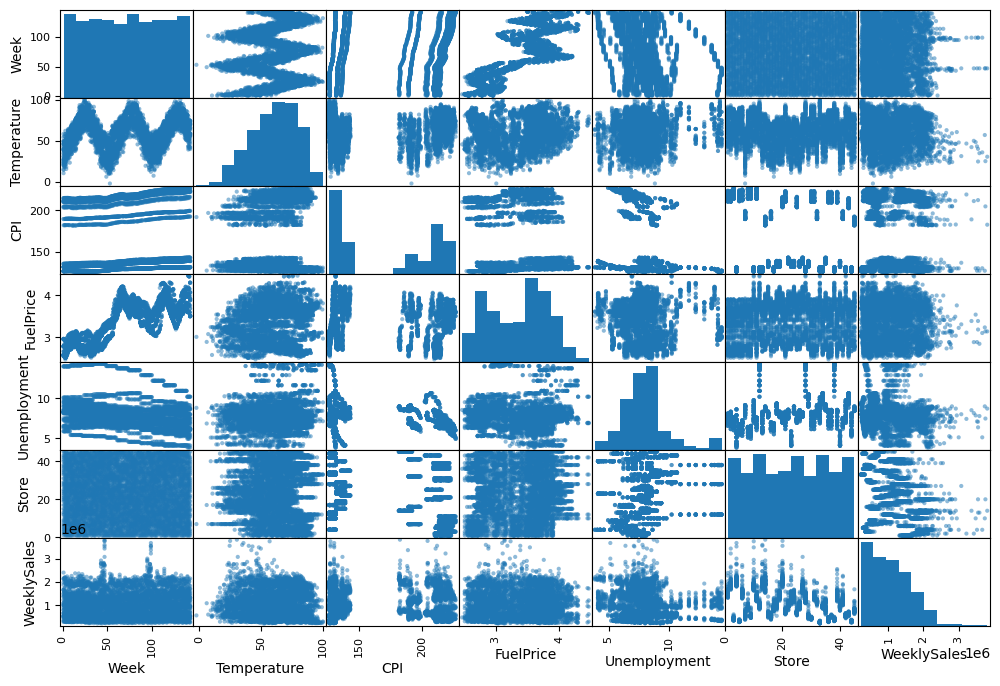

In [4]:
from pandas.plotting import scatter_matrix

# Histogram of training data
# histogram of
trainData.hist(bins=50, figsize=(20,15))
print("\033[94m", "HISTOGRAMS")
plt.show()

# Correlation Matrix of training data
print("Correlation Matrix of traing in data")
correlation_matrix = trainData.corr()
print()
print("\033[94m","CORRELATION DATA")
print(correlation_matrix)
print()
print("\033[94m","CORRELATION VS WEEKLY SALES IN ASCEDNING ORDER")
print(correlation_matrix["WeeklySales"].sort_values(ascending=False))
print()
print()
# Scatter Plot for every Numeric Attribute combination
print("Scatter plot of every numberic attribute combination")
attributes = ["Week", "Temperature", "CPI", "FuelPrice", "Unemployment", "Store", "WeeklySales"]
print("\033[94m","SCATTER MATRIX")
scatter_matrix(trainData[attributes], figsize=(12, 8))

**PREPROCESSING DATA FOR MACHINE LEARNING**

From the data description and information above, it showed that all attribute rows were equal in length and all attributes were populated.  Running an Imputer will not be necessary for this preprocessing step.

The Holiday attribute is not in numerical format.  1HotEncoder will be used for that attribute, while an OrdinalEncoder will be used on the numeric attributes.  

For the numerical data, there were not any attributes combined on this training data set. Only a Standard Scalar will used in the pipeline.

The full pipeline with both categorical and numeric attributes will be transformed with the ColumnTransformer.

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Define the numeric attributes
numeric_attributes = ['Store', 'Week', 'Temperature', 'CPI', 'FuelPrice', 'Unemployment']

# Define the categorical attributes
categorical_attributes = ['Holiday']

# Create a pipeline for the numeric attributes
numeric_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

# Create a full pipeline that handles both numeric and categorical attributes
full_pipeline = ColumnTransformer([
    ('num', numeric_pipeline, numeric_attributes),
    ('cat', OneHotEncoder(), categorical_attributes),
])

# Separate the 'WeeklySales' attribute from the train_data and use it for the labels
train_labels = trainData['WeeklySales'].copy()

# Drop the 'WeeklySales' column from the train_data
data_train = trainData.drop('WeeklySales', axis=1)

# Apply the full pipeline to the data_train
data_train_prepared = full_pipeline.fit_transform(data_train)

# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(data_train_prepared, train_labels)

# Apply the full pipeline to the test_data
data_test = testData.drop('WeeklySales', axis=1)
data_test_prepared = full_pipeline.transform(data_test)

# Predict the 'WeeklySales' in the test_data
predictions = lin_reg.predict(data_test_prepared)

# Print the first few predictions
print('First few predictions:')
print(predictions[:5])

First few predictions:
[ 726890.89227365  797627.19722539 1226713.91956733  813214.43107694
  709745.26884229]


NOW LETS GET CROSS VALIDATION SCORE AND OTHER STATISTICAL PERFORMANCE MEASURES


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Perform k-fold cross-validation
scores = cross_val_score(lin_reg, data_train_prepared, train_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

# Print the cross-validation scores
print('Cross-Validation Scores:')
print(rmse_scores)

# Calculate the R^2 value
r2 = r2_score(testData['WeeklySales'], predictions)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(testData['WeeklySales'], predictions)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(testData['WeeklySales'], predictions)

# Print the R^2 value, MAE, and MSE
print('\nR^2 Value:')
print(r2)
print('\nMean Absolute Error:')
print(mae)
print('\nMean Squared Error:')
print(mse)

Cross-Validation Scores:
[499143.41278831 534922.41009004 525323.70652581 505496.46990829
 509840.07246046 508956.89206921 563714.7110591  544289.33728177
 532363.11967668 516203.77163986]

R^2 Value:
0.11805002578062618

Mean Absolute Error:
437453.8028262147

Mean Squared Error:
270532578271.3066


Here I am gonna try and fine tune the model with RandomizedSearchCV and GridSearchCV

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Initialize a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_reg.fit(data_train_prepared, train_labels)

# Perform k-fold cross-validation
scores = cross_val_score(tree_reg, data_train_prepared, train_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

# Print the cross-validation scores
print('Cross-Validation Scores:')
print(rmse_scores)

# Make predictions on the test data
predictions = tree_reg.predict(data_test_prepared)

# Calculate the R^2 value
r2 = r2_score(testData['WeeklySales'], predictions)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(testData['WeeklySales'], predictions)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(testData['WeeklySales'], predictions)

# Print the R^2 value, MAE, and MSE
print('\nR^2 Value:')
print(r2)
print('\nMean Absolute Error:')
print(mae)
print('\nMean Squared Error:')
print(mse)

Cross-Validation Scores:
[174664.74240622 197711.62700897 203121.72200614 151531.97134842
 188747.76588181 197811.58689647 177636.16065639 159429.84763341
 193968.74204093 194799.60918278]

R^2 Value:
0.9267713650507393

Mean Absolute Error:
83838.01965034964

Mean Squared Error:
22462420766.718143


Will try randomized search and grid search for fine tuning decision tree regression model.  The results of the fine tuning you  will see did not improve upon the default values.  In fact, the results got worse.  The  decision tree regression model is still better than the linear regression model.

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

# Specify the hyperparameters for the random search
param_distribs = {
        'max_features': randint(low=1, high=8),
        'min_samples_split': randint(low=2, high=4),
    }

# Perform a random search over the hyperparameters
rnd_search = RandomizedSearchCV(tree_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(data_train_prepared, train_labels)

# Print the best hyperparameters from the random search
print('Best Hyperparameters from Random Search:')
print(rnd_search.best_params_)

# Calculate and print the evaluation metrics for the best model from the random search
best_model_rnd = rnd_search.best_estimator_
predictions_rnd = best_model_rnd.predict(data_test_prepared)
r2_rnd = r2_score(testData['WeeklySales'], predictions_rnd)
mae_rnd = mean_absolute_error(testData['WeeklySales'], predictions_rnd)
mse_rnd = mean_squared_error(testData['WeeklySales'], predictions_rnd)
print('\nR^2 Value (Random Search):')
print(r2_rnd)
print('Mean Absolute Error (Random Search):')
print(mae_rnd)
print('Mean Squared Error (Random Search):')
print(mse_rnd)



# Specify the hyperparameters for the grid search
param_grid = [
    {'max_features': [1, 2, 3, 4, 5, 6, 7], 'min_samples_split': [2, 3, 4]},
]

# Perform a grid search over the hyperparameters
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(data_train_prepared, train_labels)
print()
print()
print()
# Print the best hyperparameters from the grid search
print('Best Hyperparameters from Grid Search:')
print(grid_search.best_params_)

# Calculate and print the evaluation metrics for the best model from the grid search
best_model_grid = grid_search.best_estimator_
predictions_grid = best_model_grid.predict(data_test_prepared)
r2_grid = r2_score(testData['WeeklySales'], predictions_grid)
mae_grid = mean_absolute_error(testData['WeeklySales'], predictions_grid)
mse_grid = mean_squared_error(testData['WeeklySales'], predictions_grid)
print('\nR^2 Value (Grid Search):')
print(r2_grid)
print('Mean Absolute Error (Grid Search):')
print(mae_grid)
print('Mean Squared Error (Grid Search):')
print(mse_grid)

Best Hyperparameters from Random Search:
{'max_features': 7, 'min_samples_split': 3}

R^2 Value (Random Search):
0.9179269425353034
Mean Absolute Error (Random Search):
84177.19268453769
Mean Squared Error (Random Search):
25175391452.543606



Best Hyperparameters from Grid Search:
{'max_features': 6, 'min_samples_split': 4}

R^2 Value (Grid Search):
0.9050432619464999
Mean Absolute Error (Grid Search):
86215.10418285418
Mean Squared Error (Grid Search):
29127379013.287113


Lets now try and Random Forest regression model.

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)

# Fit the model to the training data
forest_reg.fit(data_train_prepared, train_labels)

# Perform k-fold cross-validation
scores = cross_val_score(forest_reg, data_train_prepared, train_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

# Print the cross-validation scores
print('Cross-Validation Scores:')
print(rmse_scores)

# Make predictions on the test data
predictions = forest_reg.predict(data_test_prepared)

# Calculate the R^2 value
r2 = r2_score(testData['WeeklySales'], predictions)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(testData['WeeklySales'], predictions)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(testData['WeeklySales'], predictions)

# Print the R^2 value, MAE, and MSE
print('\nR^2 Value:')
print(r2)
print('\nMean Absolute Error:')
print(mae)
print('\nMean Squared Error:')
print(mse)

Cross-Validation Scores:
[149812.12616798 160323.98049694 177900.23537031 120157.99342999
 137289.8406949  166819.68678005 172838.85192035 153142.8778096
 149220.05075158 151005.93631666]

R^2 Value:
0.944276540035834

Mean Absolute Error:
72120.19677466978

Mean Squared Error:
17092819020.31556


I will now try to fine tune random Forest regression model with randomized and grid searches

In [17]:
# Specify the hyperparameters for the random search
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

# Perform a random search over the hyperparameters
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(data_train_prepared, train_labels)

# Print the best hyperparameters from the random search
print('Best Hyperparameters from Random Search:')
print(rnd_search.best_params_)

# Calculate and print the evaluation metrics for the best model from the random search
best_model_rnd = rnd_search.best_estimator_
predictions_rnd = best_model_rnd.predict(data_test_prepared)
r2_rnd = r2_score(testData['WeeklySales'], predictions_rnd)
mae_rnd = mean_absolute_error(testData['WeeklySales'], predictions_rnd)
mse_rnd = mean_squared_error(testData['WeeklySales'], predictions_rnd)
print('\nR^2 Value (Random Search):')
print(r2_rnd)
print('Mean Absolute Error (Random Search):')
print(mae_rnd)
print('Mean Squared Error (Random Search):')
print(mse_rnd)

# Specify the hyperparameters for the grid search
param_grid = [
    {'n_estimators': [10, 50, 100, 150, 200], 'max_features': [1, 2, 3, 4, 5, 6, 7]},
]

# Perform a grid search over the hyperparameters
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(data_train_prepared, train_labels)
print()
print()
print()
# Print the best hyperparameters from the grid search
print('Best Hyperparameters from Grid Search:')
print(grid_search.best_params_)

# Calculate and print the evaluation metrics for the best model from the grid search
best_model_grid = grid_search.best_estimator_
predictions_grid = best_model_grid.predict(data_test_prepared)
r2_grid = r2_score(testData['WeeklySales'], predictions_grid)
mae_grid = mean_absolute_error(testData['WeeklySales'], predictions_grid)
mse_grid = mean_squared_error(testData['WeeklySales'], predictions_grid)
print('\nR^2 Value (Grid Search):')
print(r2_grid)
print('Mean Absolute Error (Grid Search):')
print(mae_grid)
print('Mean Squared Error (Grid Search):')
print(mse_grid)

Best Hyperparameters from Random Search:
{'max_features': 5, 'n_estimators': 100}

R^2 Value (Random Search):
0.9537889948929977
Mean Absolute Error (Random Search):
66930.79790738148
Mean Squared Error (Random Search):
14174933637.444872



Best Hyperparameters from Grid Search:
{'max_features': 4, 'n_estimators': 200}

R^2 Value (Grid Search):
0.9539233606617717
Mean Absolute Error (Grid Search):
67440.12159716389
Mean Squared Error (Grid Search):
14133717787.430237


CHANGING ATTRIBUTES

In [18]:
# Define the bin edges and labels
bins = [np.NINF, np.percentile(trainData['Temperature'], 33), np.percentile(trainData['Temperature'], 67), np.inf]
labels = ['low', 'medium', 'high']

# Bin the 'Temperature' attribute
trainData['Temperature'] = pd.cut(trainData['Temperature'], bins=bins, labels=labels)
testData['Temperature'] = pd.cut(testData['Temperature'], bins=bins, labels=labels)

# Bin the 'FuelPrice' attribute
bins = [np.NINF, np.percentile(trainData['FuelPrice'], 33), np.percentile(trainData['FuelPrice'], 67), np.inf]
trainData['FuelPrice'] = pd.cut(trainData['FuelPrice'], bins=bins, labels=labels)
testData['FuelPrice'] = pd.cut(testData['FuelPrice'], bins=bins, labels=labels)

# Bin the 'Unemployment' attribute
bins = [np.NINF, np.percentile(trainData['Unemployment'], 33), np.percentile(trainData['Unemployment'], 67), np.inf]
trainData['Unemployment'] = pd.cut(trainData['Unemployment'], bins=bins, labels=labels)
testData['Unemployment'] = pd.cut(testData['Unemployment'], bins=bins, labels=labels)

# Print the head of the dataframes to verify the binning
print('Train Sales Data:')
print(trainData.head())
print('\nTest Sales Data:')
print(testData.head())

Train Sales Data:
   Store  Week Temperature Holiday         CPI FuelPrice Unemployment  \
0      8   109         low      No  224.395979    medium          low   
1      2   127        high      No  221.521506    medium          low   
2     38    72        high      No  129.043200      high         high   
3     41    27      medium      No  190.099003       low       medium   
4     35   125        high      No  142.160646    medium         high   

   WeeklySales  
0    952264.91  
1   2041507.40  
2    356797.00  
3   1338132.72  
4    911696.00  

Test Sales Data:
   Store  Week Temperature Holiday         CPI FuelPrice Unemployment  \
0     41    19      medium      No  189.400073       low       medium   
1     42    71        high      No  129.035710      high         high   
2      6    60        high      No  216.143816    medium          low   
3     38   137        high      No  130.977667      high         high   
4     36    27        high      No  210.261493       low  

Running the Linear Regression Model on the new training data after binning the attributes

After binning the CPI, FuelPrice, and Unemployment attributes there was not a signifigant change in the correlations as shown in the chart below.  

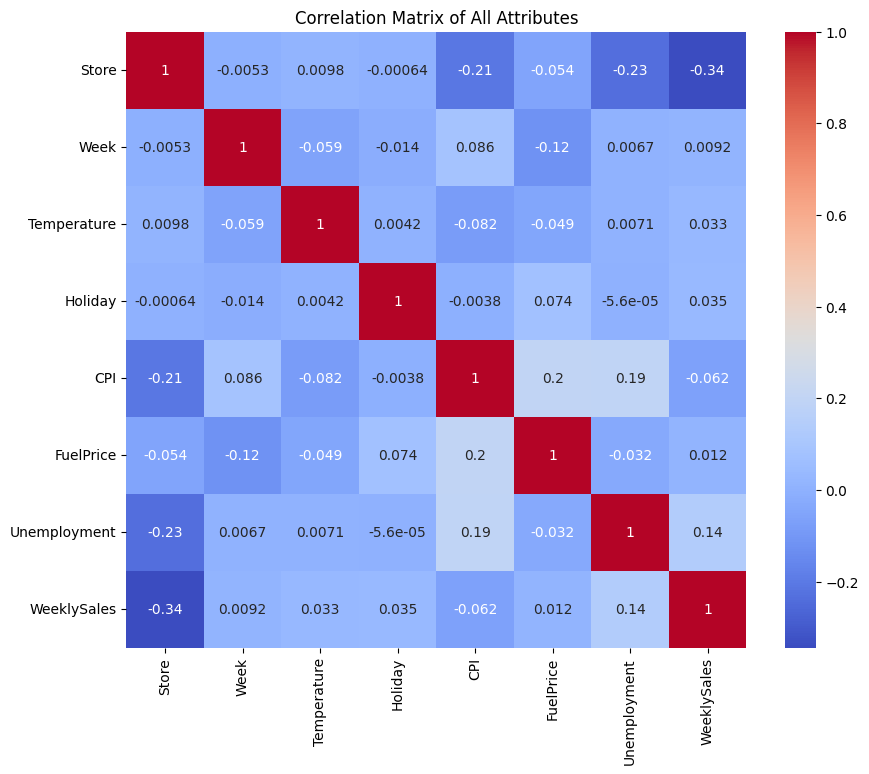

In [19]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the dataframes
df_train = trainData.copy()
df_test = testData.copy()

# Initialize the LabelEncoder
le = LabelEncoder()

# Convert the categorical attributes to numeric values
for col in ['Temperature', 'FuelPrice', 'Unemployment', 'Holiday']:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

# Calculate the correlation matrix
corr_matrix = df_train.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of All Attributes')
plt.show()

In [20]:

import pandas as pd

trainData = pd.read_csv('trainSales.csv')
testData = pd.read_csv('testSales.csv')
print('trainData:')
print(trainData.head())
print('\ntestData:')
print(testData.head())


trainData:
   Store  Week  Temperature Holiday         CPI  FuelPrice  Unemployment  \
0      8   109        50.95      No  224.395979      3.630         5.825   
1      2   127        84.20      No  221.521506      3.227         6.565   
2     38    72        86.84      No  129.043200      3.935        13.736   
3     41    27        69.21      No  190.099003      2.690         7.335   
4     35   125        73.23      No  142.160646      3.564         8.876   

   WeeklySales  
0    952264.91  
1   2041507.40  
2    356797.00  
3   1338132.72  
4    911696.00  

testData:
   Store  Week  Temperature Holiday         CPI  FuelPrice  Unemployment  \
0     41    19        63.36      No  189.400073      2.684         7.363   
1     42    71        84.57      No  129.035710      3.981         8.494   
2      6    60        70.83      No  216.143816      3.473         6.858   
3     38   137        83.64      No  130.977667      4.133        10.926   
4     36    27        85.49      No  21

In [21]:
# Inspect the 'Store', 'Week', and 'Holiday' columns in the training data
print('Unique values in the Store column:', trainData['Store'].unique())
print('Unique values in the Week column:', trainData['Week'].unique())
print('Unique values in the Holiday column:', trainData['Holiday'].unique())

# Apply one-hot encoding to the 'Store', 'Week', and 'Holiday' columns in the training data
trainData = pd.get_dummies(trainData, columns=['Store', 'Week', 'Holiday'])

# Apply one-hot encoding to the 'Store', 'Week', and 'Holiday' columns in the test data
testData = pd.get_dummies(testData, columns=['Store', 'Week', 'Holiday'])

print('trainData after one-hot encoding:')
print(trainData.head())
print('\ntestData after one-hot encoding:')
print(testData.head())



Unique values in the Store column: [ 8  2 38 41 35 12 43  5 44  1  6 31  4  3 30 21 36 22 45 32 16 25 18 17
 42 13 39 37 15 28 14 24 34 33 19 11 29 27  9 20 26  7 10 23 40]
Unique values in the Week column: [109 127  72  27 125  98  89  22 133 137  69  67  56  45  58   4  18  55
 128  40 111  20  96 108   7  43  14  59  88  91 100 112 117 116  81  53
 118  34  35  26  41  77  54 138 101 135 119  32  15  30 142  19  16 120
  85  23  17  21 131  33  78 104 110  99  10 141 122  13   1  37  92  31
  80  68  97  70  48  75  52  12  50   6  49  82 106  62   9  73 140 132
 123  86  39  65  87  44  11  60 126 129 113 143  28  25  61  79 105  93
  83 121 115   3 130 139   8  95 124  74  38  36  42  51 114  84  94  46
 136   2  57 103 107  47 134  90  29  63  66   5  24 102  64  71  76]
Unique values in the Holiday column: ['No' 'Yes']
trainData after one-hot encoding:
   Temperature         CPI  FuelPrice  Unemployment  WeeklySales  Store_1  \
0        50.95  224.395979      3.630         5.825